In [1]:
import numpy as np 
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

 1. Какую задачу мы будем решать после преобразования? В зависимости от задачи обработка данных должна производится по разному
   * Есть начальные размеченные данные(в матрице присутствуют метки классов). По этим данным строим матрицу преобразования признаков из исходного пространства в новое пространство. Сохраняем эту матрицу $W$. Затем появляются real-time данные и мы хотим их тоже преобразовать в новое пространство. Делаем это с помощью матрицы $W$. Затем проводится классификация на новых данных.
   * Есть набор неразмеченных данных. Нужно перевести их в новое пространство, чтобы в дальнейшем выделить в этих данных кластеры. 
   
2. Нужно ли нормализовать исходную матрицу? Посмотреть через эксперимент 

3. Нарисовать графики в 2D и 3D





4. Разбить выборку на train и test для t-sne. Смоделировать поток реальных данных

5. Сравнивать k-pca и pca 



# 1. Считываем данные и собираем из них датасет

In [2]:
cone_data = pd.read_csv('cone.csv', delimiter=r"\s+")
cone_data = cone_data.drop(columns=['arg'])
cylinder_data = pd.read_csv('cylinder.csv', delimiter=r"\s+")
cylinder_data = cylinder_data.drop(columns=['arg'])

cone_target = np.ones((91, 1), dtype=int)
cylinder_target = cone_target + 1
target = np.concatenate((cone_target, cylinder_target))
union_data = pd.concat([cone_data, cylinder_data])
union_data.insert(loc=union_data.shape[1], column="class", value=target)

union_data.head()

,HH.Re,HH.Im,HV.Re,HV.Im,VH.Re,VH.Im,VV.Re,VV.Im,class
0,0.956940,0.185970,0.033606,-0.024850,-0.03361,0.024850,-0.99575,-0.15728,1
1,0.877020,0.261629,0.040545,-0.015380,-0.04055,0.015376,-0.91998,-0.24330,1
2,0.783459,0.324072,0.044947,-0.004260,-0.04495,0.004258,-0.82781,-0.31676,1
3,0.681292,0.372362,0.043603,0.005807,-0.04360,-0.005810,-0.72802,-0.37866,1
4,0.571329,0.403099,0.042011,0.018000,-0.04201,-0.018000,-0.61354,-0.41926,1


In [3]:
X = union_data.drop(columns=['class'])
y = union_data['class']

# 2. PCA 

In [17]:
from sklearn.decomposition import PCA

#### 2.1. Поcтроим график зависимости дисперсии от числа компонент

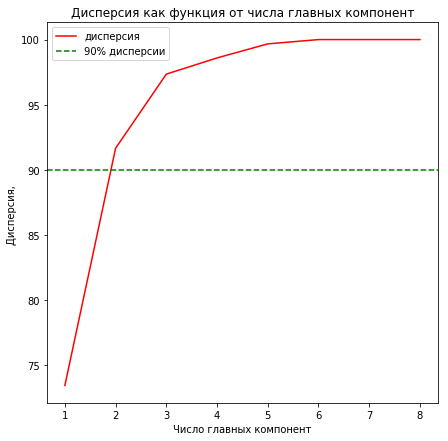

In [43]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_) * 100
dimensions = np.linspace(1, 8, 8, dtype=int)

plt.figure(figsize=(7, 7))
plt.plot(dimensions, cumsum, color="red", label="дисперсия")
plt.title("Дисперсия как функция от числа главных компонент")
plt.ylabel("Дисперсия, ")
plt.xlabel("Число главных компонент")
plt.axhline(y=90, color="green", linestyle="--", label="90% дисперсии")
plt.legend(loc="best")

Из графика видно, что достаточно первых 2-х главных компонент для сохранения 90% дисперсии. 

#### 2.2. Построим диаграмму, которая показывает сколько дисперсии в % приходится на каждую из главных компонент

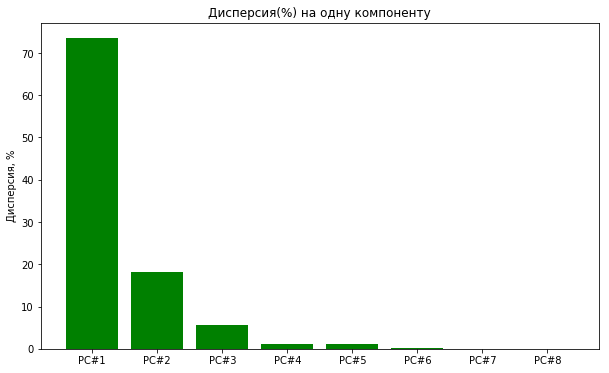

In [53]:
component_names = ['PC#1', 'PC#2', 'PC#3', 'PC#4', 'PC#5', 'PC#6', 'PC#7', 'PC#8']
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(component_names, np.around(pca.explained_variance_ratio_ * 100, 1), color="green")
ax.set_ylabel("Дисперсия, %")
ax.set_title("Дисперсия(%) на одну компоненту")
plt.show()

In [54]:
pca = PCA(n_components=3)

# Обучим модель на имеющихся у нас данных
pca.fit(X)

# Проецируем в новое пространство наши даннные. Таким же образом будут проецироваться новые поступающие нам данные 
# pca.transform(real_time_X_dataset)
X_pca = pca.transform(X)

#### 2.3. Представление исходных данных в пространстве первых 2-х главных компонент

<IPython.core.display.Javascript object>


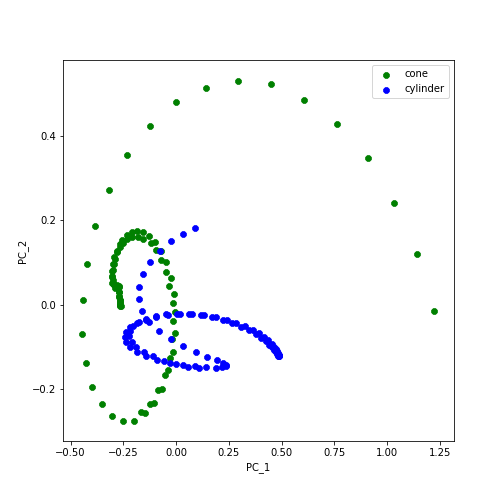

In [94]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X_pca[0:91, 0], X_pca[0:91, 1], color="green", marker="8", label="cone")
ax.scatter(X_pca[92:, 0], X_pca[92:, 1], color="blue", marker="8", label="cylinder")
ax.set_xlabel("PC_1")
ax.set_ylabel("PC_2")
plt.legend(loc="best")
plt.show()

#### 2.3. Представление исходных данных в пространстве первых 3-х главных компонент

<IPython.core.display.Javascript object>


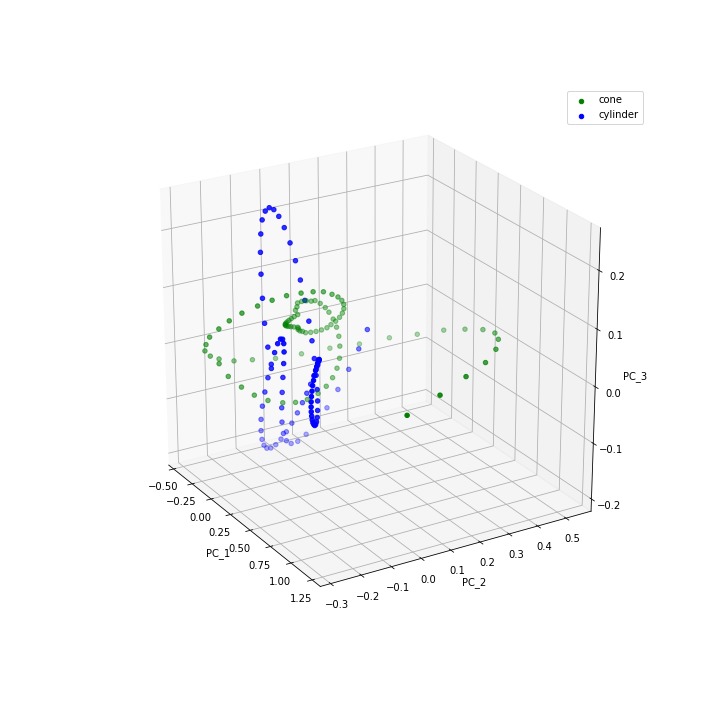

In [93]:
fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(111, projection='3d')
axes.view_init(azim=-31, elev=24)
axes.scatter(X_pca[0:91, 0], X_pca[0:91, 1], X_pca[0:91, 2], color="green", label="cone")
axes.scatter(X_pca[92:, 0], X_pca[92:, 1], X_pca[92:, 2], color="blue", label="cylinder")
axes.set_xlabel("PC_1")
axes.set_ylabel("PC_2")
axes.set_zlabel("PC_3")
plt.legend(loc="best")
plt.show()

# 3. Kernel PCA